##Lectura de datos

In [2]:
import pandas as pd

file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del conjunto de datos
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


##Traducción de columnas

In [7]:
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'Pregnancies': 'Embarazos',
    'Glucose': 'Glucosa',
    'BloodPressure': 'PresionSanguinea',
    'SkinThickness': 'GrosorPiel',
    'Insulin': 'Insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'FuncionPedigreeDiabetes',
    'Age': 'Edad',
    'Outcome': 'Resultado'
}

# Renombrar las columnas en el DataFrame
data_translated = data.rename(columns=column_translation)

# Mostrar las primeras filas del DataFrame con las columnas renombradas
print(data_translated.head())


   Embarazos  Glucosa  PresionSanguinea  GrosorPiel  Insulina   IMC  \
0          6      148                72          35         0  33.6   
1          1       85                66          29         0  26.6   
2          8      183                64           0         0  23.3   
3          1       89                66          23        94  28.1   
4          0      137                40          35       168  43.1   

   FuncionPedigreeDiabetes  Edad  Resultado  
0                    0.627    50          1  
1                    0.351    31          0  
2                    0.672    32          1  
3                    0.167    21          0  
4                    2.288    33          1  


## Descripción Básica

In [10]:
# Descripción básica del conjunto de datos
print(data_translated.describe())

        Embarazos     Glucosa  PresionSanguinea  GrosorPiel    Insulina  \
count  768.000000  768.000000        768.000000  768.000000  768.000000   
mean     3.845052  120.894531         69.105469   20.536458   79.799479   
std      3.369578   31.972618         19.355807   15.952218  115.244002   
min      0.000000    0.000000          0.000000    0.000000    0.000000   
25%      1.000000   99.000000         62.000000    0.000000    0.000000   
50%      3.000000  117.000000         72.000000   23.000000   30.500000   
75%      6.000000  140.250000         80.000000   32.000000  127.250000   
max     17.000000  199.000000        122.000000   99.000000  846.000000   

              IMC  FuncionPedigreeDiabetes        Edad   Resultado  
count  768.000000               768.000000  768.000000  768.000000  
mean    31.992578                 0.471876   33.240885    0.348958  
std      7.884160                 0.331329   11.760232    0.476951  
min      0.000000                 0.078000   21.

## Información del conjunto de datos

In [11]:

print(data_translated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Embarazos                768 non-null    int64  
 1   Glucosa                  768 non-null    int64  
 2   PresionSanguinea         768 non-null    int64  
 3   GrosorPiel               768 non-null    int64  
 4   Insulina                 768 non-null    int64  
 5   IMC                      768 non-null    float64
 6   FuncionPedigreeDiabetes  768 non-null    float64
 7   Edad                     768 non-null    int64  
 8   Resultado                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


## Selección de características

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características (X) y la variable objetivo (y)
X = data.drop(columns=['Outcome'])  # Asumiendo que la columna 'Outcome' es la variable objetivo
y = data['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Optimización de hiperpárametros del modelo seleccionado

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


##Validación cruzada

In [14]:
from sklearn.model_selection import cross_val_score

# Obtener el mejor modelo
best_rf = grid_search.best_estimator_

# Realizar validación cruzada
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)

# Mostrar las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada: ", cv_scores)
print("Media de puntuaciones de validación cruzada: ", cv_scores.mean())


Puntuaciones de validación cruzada:  [0.76422764 0.82926829 0.75609756 0.75609756 0.81967213]
Media de puntuaciones de validación cruzada:  0.7850726376116219


## Métricas de desempeño

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)

# Obtener el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Obtener la matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Matriz de confusión:
 [[79 20]
 [19 36]]


Exactitud (Accuracy): 0.7467532467532467
Precisión (Precision): 0.6428571428571429
Sensibilidad (Recall): 0.6545454545454545
Puntuación F1 (F1 Score): 0.6486486486486486
ROC-AUC: 0.8310376492194673
Matriz de Confusión:
 [[79 20]
 [19 36]]


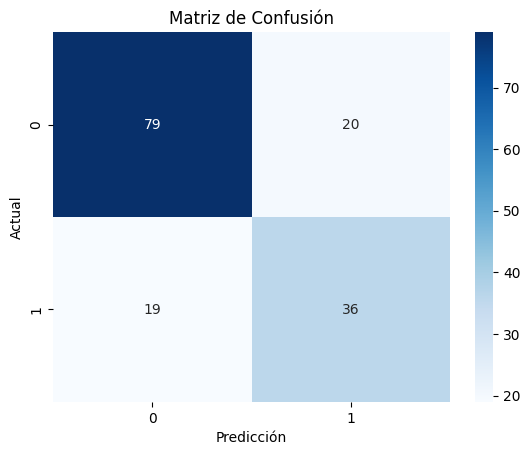

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predecir en el conjunto de prueba
y_pred = best_rf.predict(X_test_scaled)
y_pred_prob = best_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para ROC-AUC

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Mostrar las métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)
print("ROC-AUC:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Graficar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


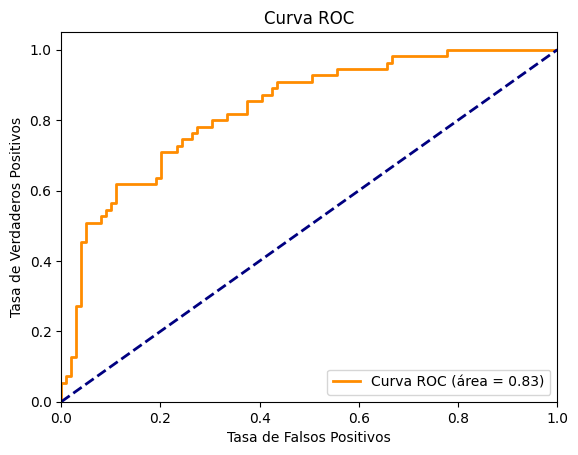

In [19]:
# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Análisis Univariado

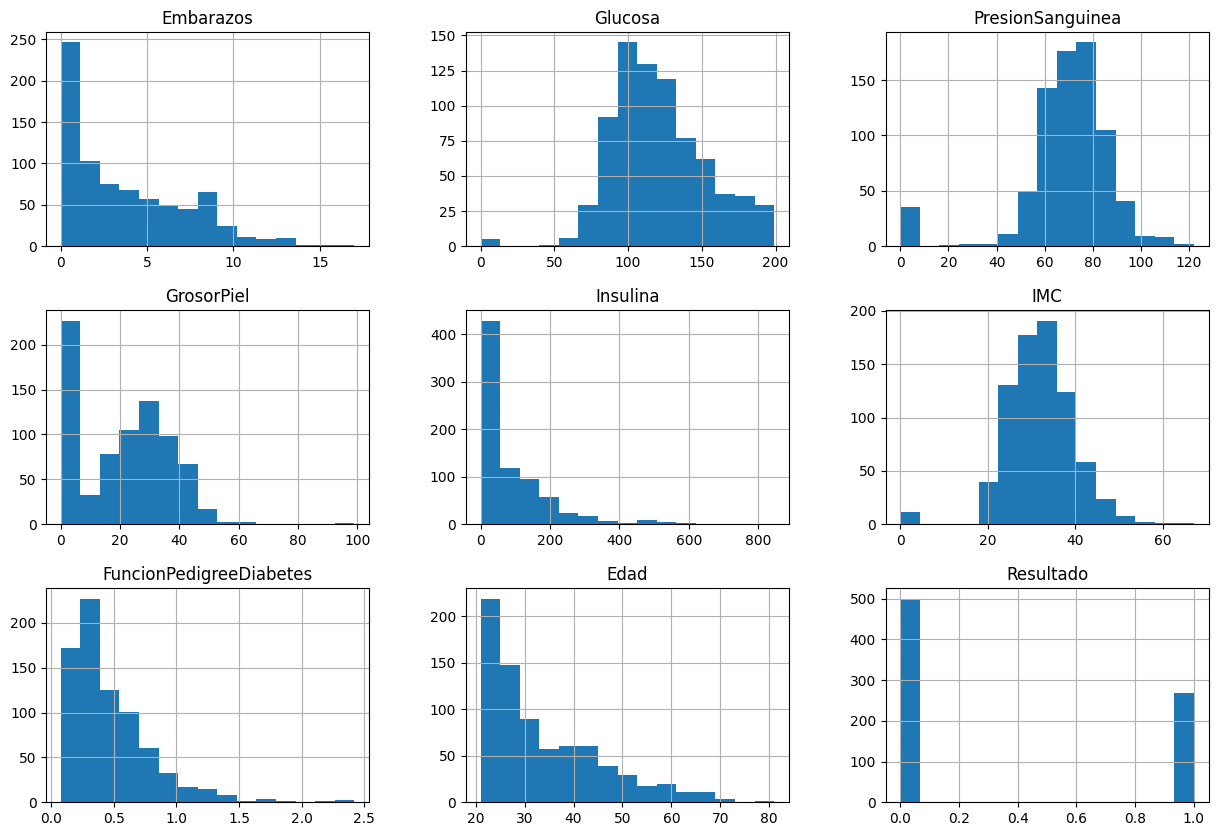

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para cada variable
data_translated.hist(bins=15, figsize=(15, 10))
plt.show()

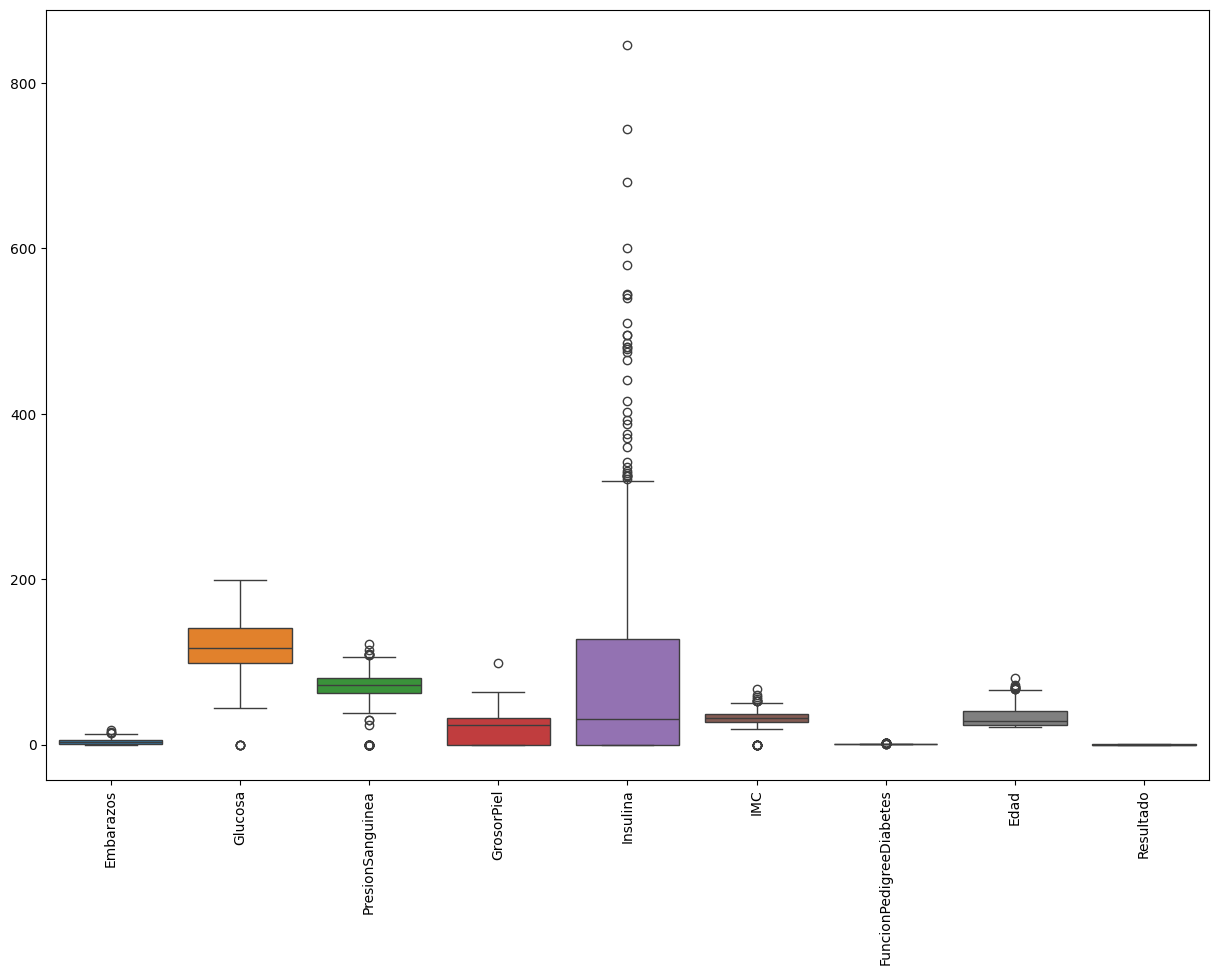

In [24]:
# Boxplot para cada variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_translated)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Descripción estadística
print(data_translated.describe())

        Embarazos     Glucosa  PresionSanguinea  GrosorPiel    Insulina  \
count  768.000000  768.000000        768.000000  768.000000  768.000000   
mean     3.845052  120.894531         69.105469   20.536458   79.799479   
std      3.369578   31.972618         19.355807   15.952218  115.244002   
min      0.000000    0.000000          0.000000    0.000000    0.000000   
25%      1.000000   99.000000         62.000000    0.000000    0.000000   
50%      3.000000  117.000000         72.000000   23.000000   30.500000   
75%      6.000000  140.250000         80.000000   32.000000  127.250000   
max     17.000000  199.000000        122.000000   99.000000  846.000000   

              IMC  FuncionPedigreeDiabetes        Edad   Resultado  
count  768.000000               768.000000  768.000000  768.000000  
mean    31.992578                 0.471876   33.240885    0.348958  
std      7.884160                 0.331329   11.760232    0.476951  
min      0.000000                 0.078000   21.

##Análisis Bivariado

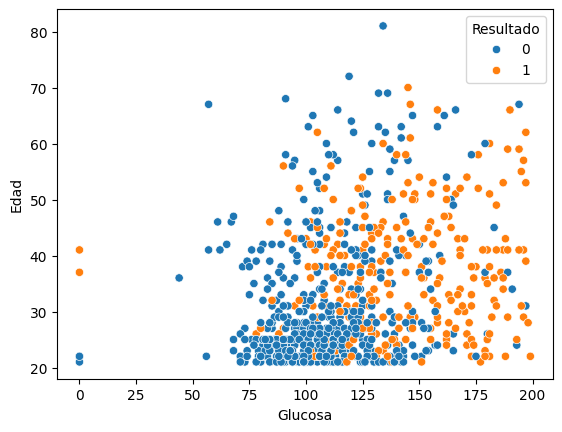

In [27]:
# Scatter plot de Glucosa vs. Edad coloreado por Resultado
sns.scatterplot(x='Glucosa', y='Edad', hue='Resultado', data=data_translated)
plt.show()

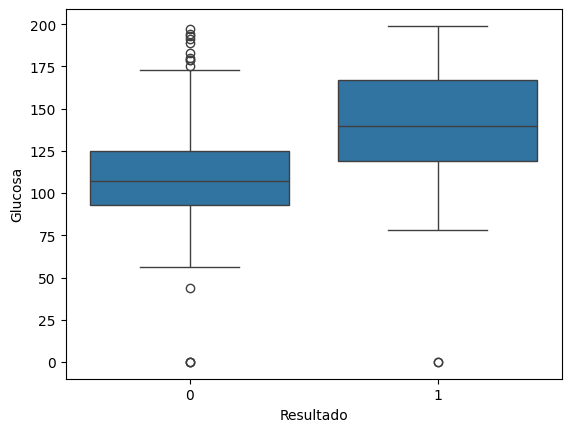

In [28]:
# Boxplot de Glucosa por Resultado
sns.boxplot(x='Resultado', y='Glucosa', data=data_translated)
plt.show()

In [29]:
# Tablas de contingencia
contingency_table = pd.crosstab(data_translated['Resultado'], data_translated['Edad'])
print(contingency_table)

Edad       21  22  23  24  25  26  27  28  29  30  ...  63  64  65  66  67  \
Resultado                                          ...                       
0          58  61  31  38  34  25  24  25  16  15  ...   4   1   3   2   2   
1           5  11   7   8  14   8   8  10  13   6  ...   0   0   0   2   1   

Edad       68  69  70  72  81  
Resultado                      
0           1   2   0   1   1  
1           0   0   1   0   0  

[2 rows x 52 columns]


## Análisis Multivariado

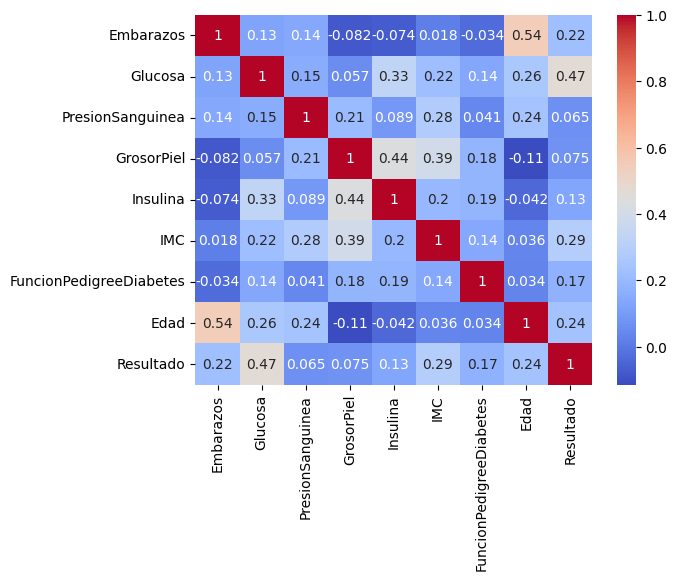

In [31]:
corr_matrix = data_translated.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

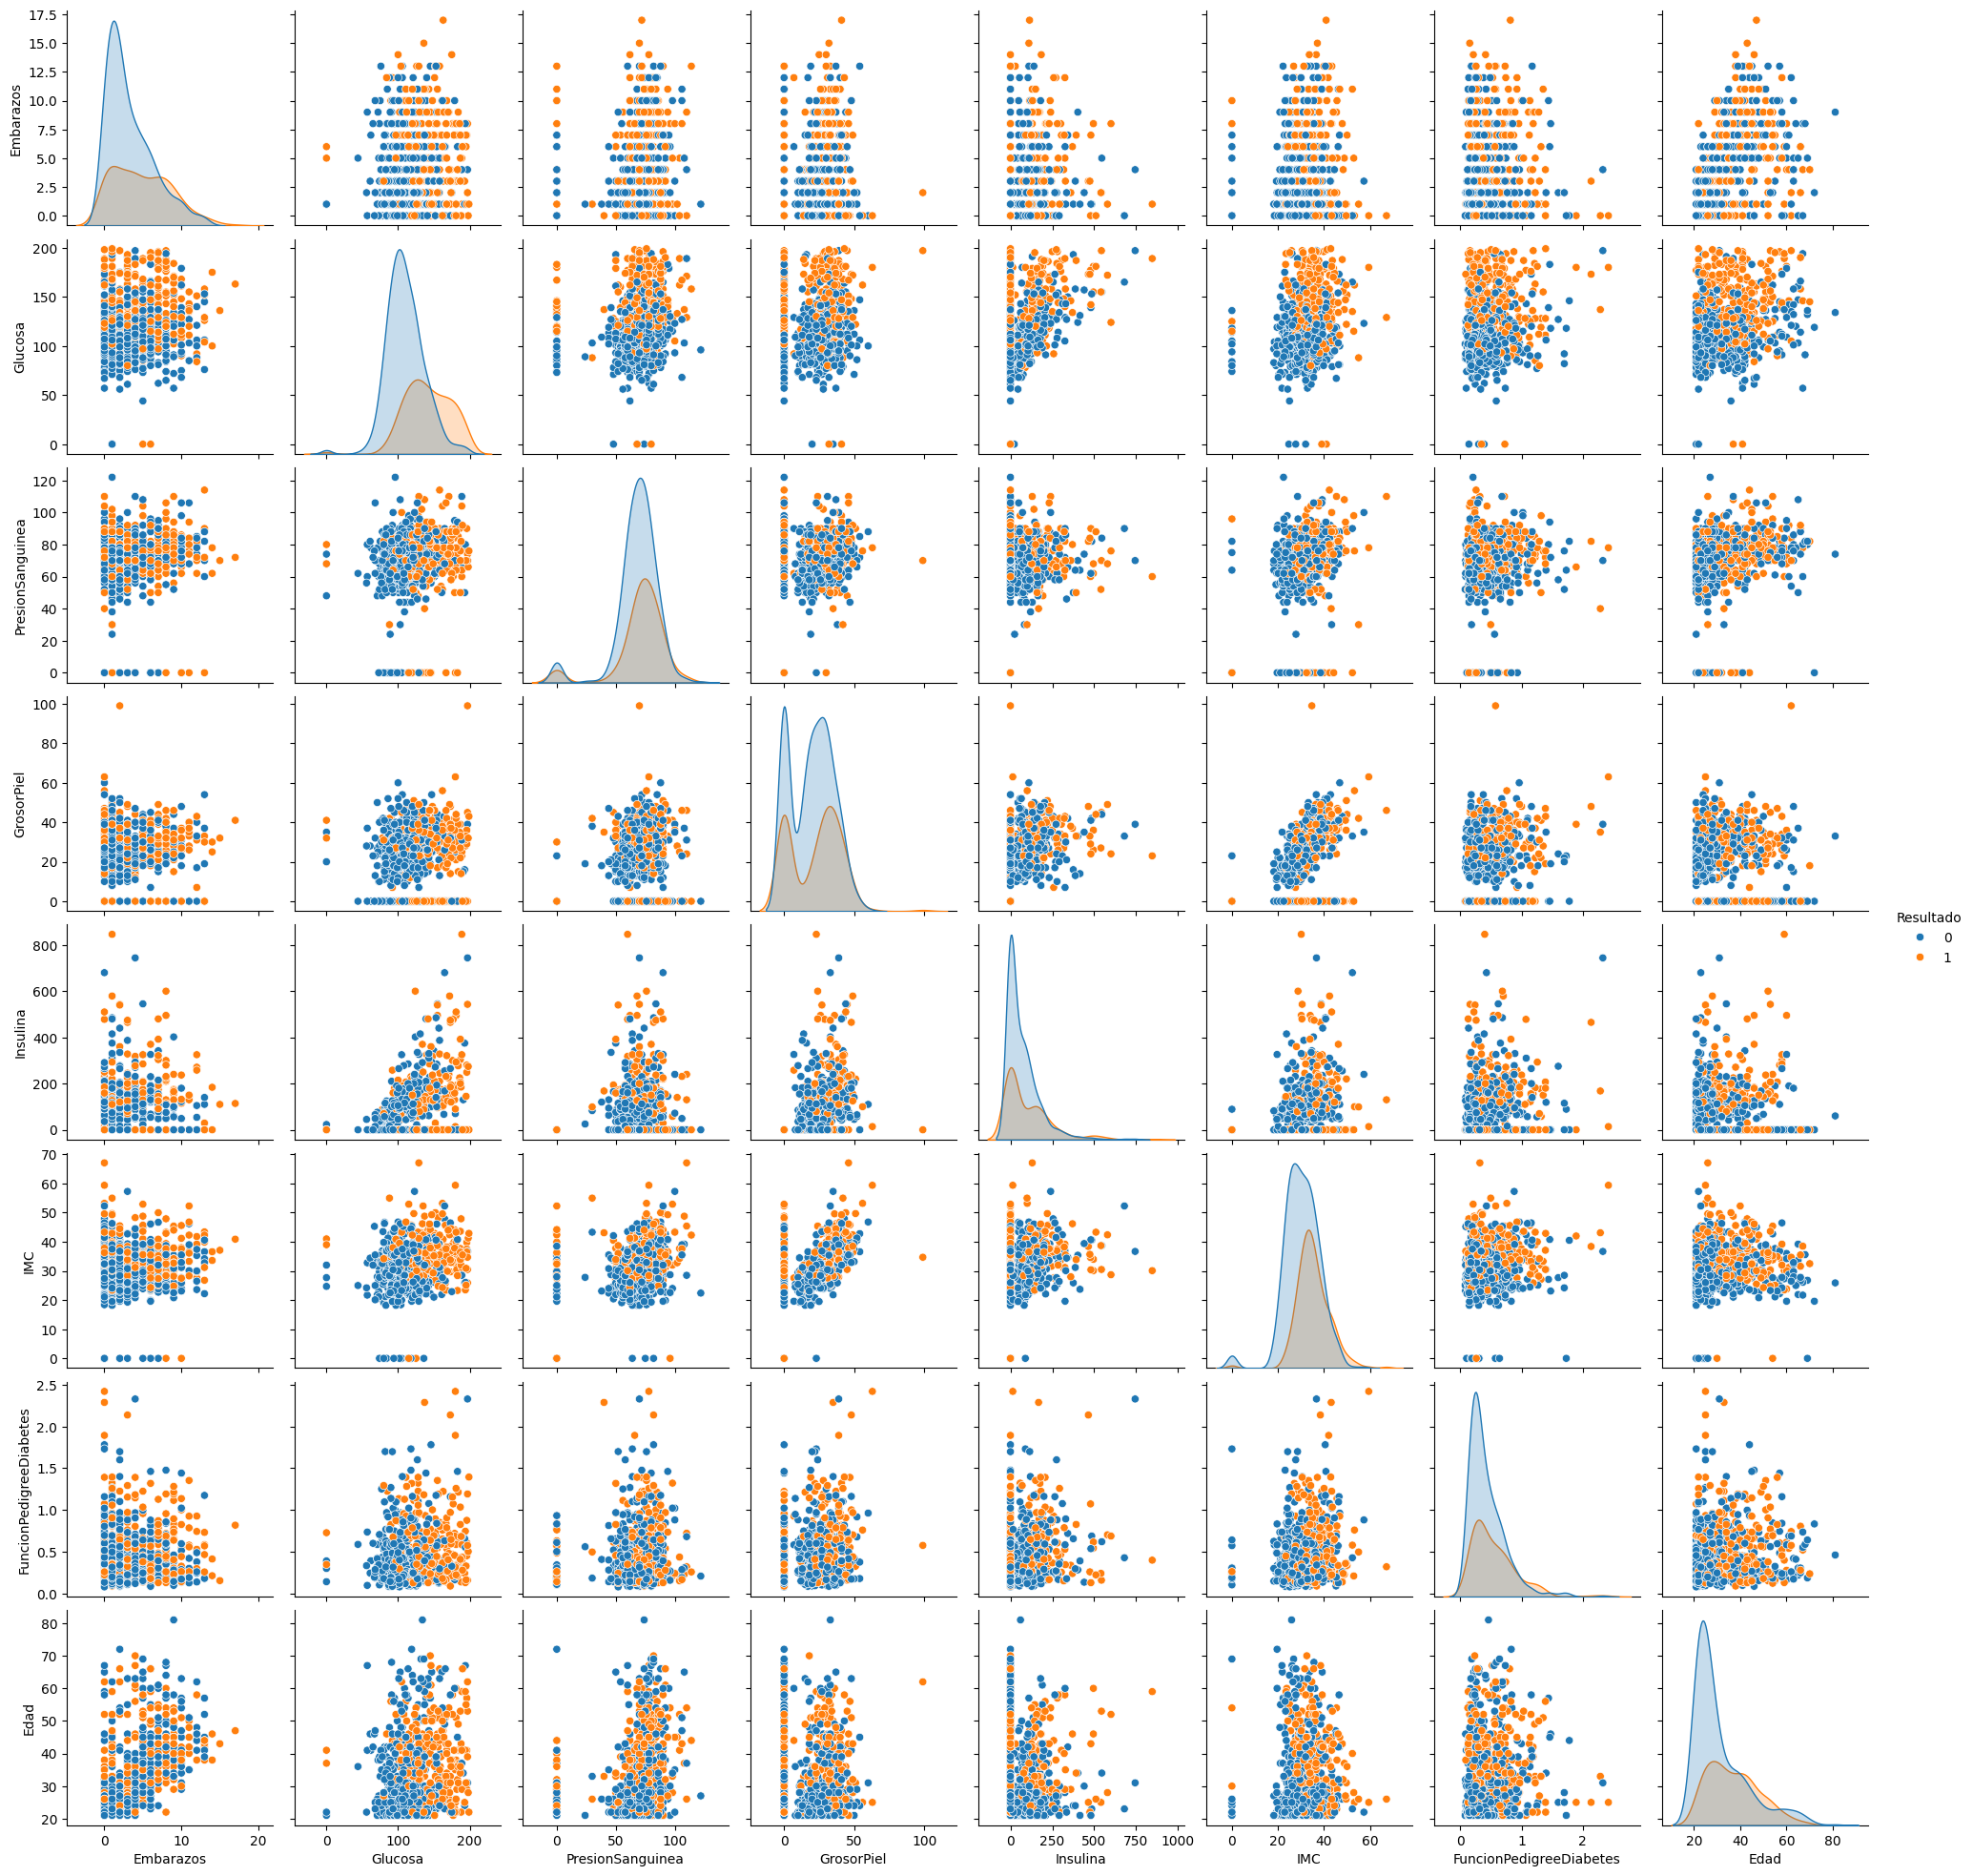

In [32]:
# Pairplot de todas las variables coloreadas por Resultado
sns.pairplot(data_translated, hue='Resultado')
plt.show()

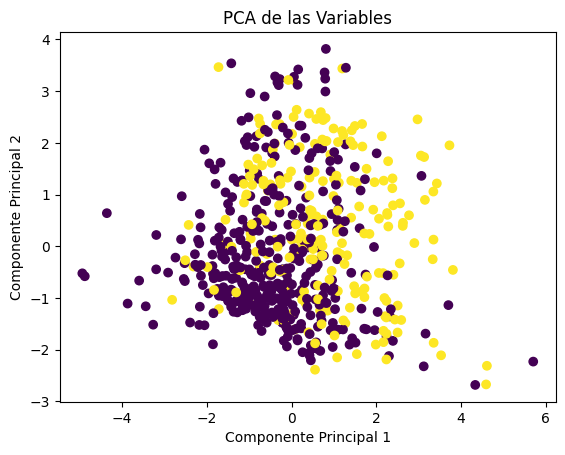

In [33]:
# Análisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_train)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las Variables')
plt.show()

## Importancia de las Características (Feature Importance)

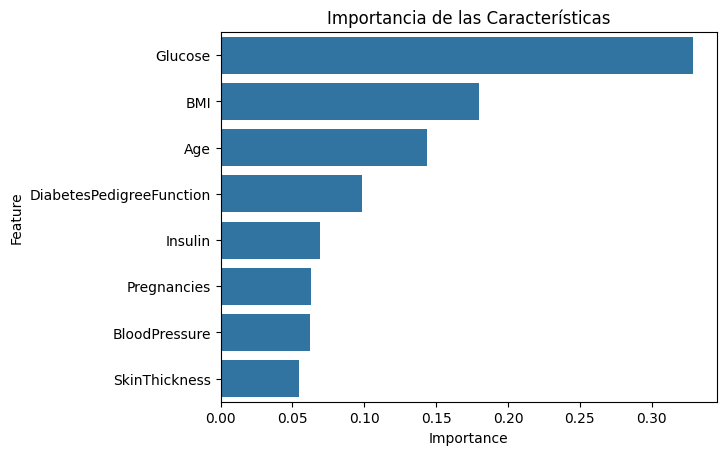

In [35]:
# Importancia de características en Random Forest
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()

##Análisis de Valores Atípicos (Outliers)

Número de outliers:  39


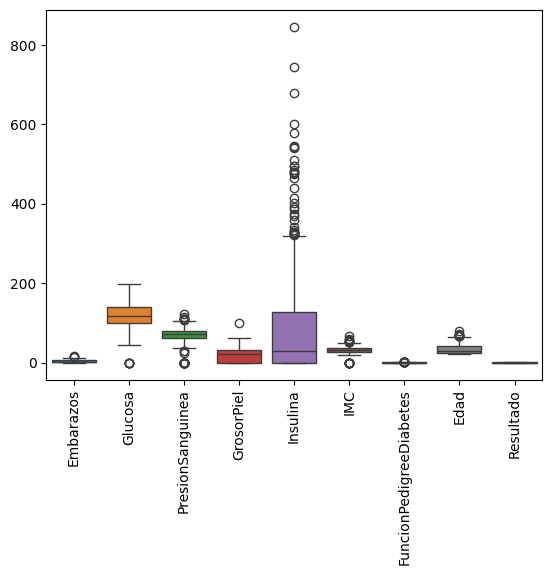

In [37]:
from scipy.stats import zscore

# Cálculo de Z-Scores
z_scores = zscore(data_translated)
outliers = (z_scores > 3).any(axis=1)  # Identifica outliers con Z-score > 3
print("Número de outliers: ", outliers.sum())

# Boxplot para visualizar outliers
sns.boxplot(data=data_translated)
plt.xticks(rotation=90)
plt.show()


In [48]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un conjunto de datos X_train y X_test


In [49]:
# Inicializar el modelo IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
iso_forest.fit(X_train)


IsolationForest(contamination=0.05, random_state=42)

In [50]:
# Predecir los outliers en el conjunto de prueba
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# -1 indica outliers, 1 indica inliers (datos normales)
X_train_outliers = X_train[y_pred_train == -1]
X_test_outliers = X_test[y_pred_test == -1]

print(f"Valores atípicos detectados en el conjunto de entrenamiento: {len(X_train_outliers)}")
print(f"Valores atípicos detectados en el conjunto de prueba: {len(X_test_outliers)}")


Valores atípicos detectados en el conjunto de entrenamiento: 16
Valores atípicos detectados en el conjunto de prueba: 5


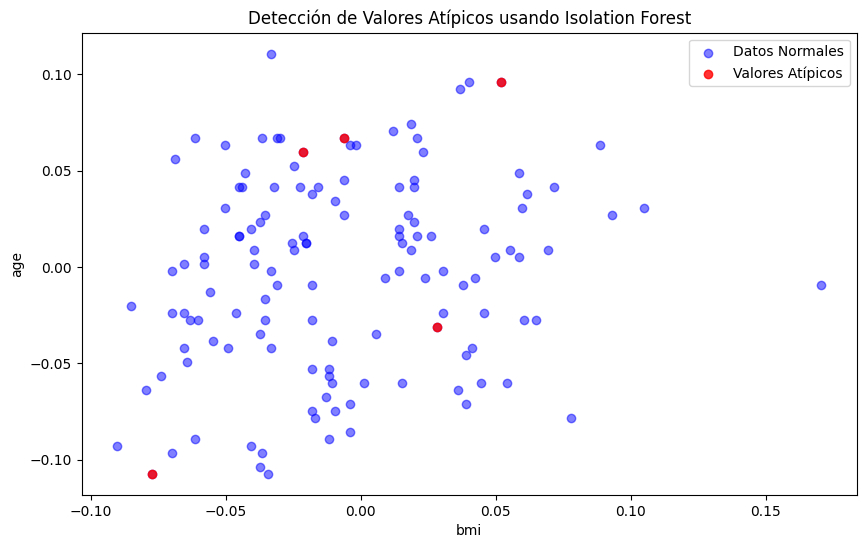

In [51]:
# Seleccionar dos características para graficar
feature1 = 'bmi'
feature2 = 'age'

plt.figure(figsize=(10, 6))
plt.scatter(X_test[feature1], X_test[feature2], label="Datos Normales", color='blue', alpha=0.5)
plt.scatter(X_test_outliers[feature1], X_test_outliers[feature2], label="Valores Atípicos", color='red', alpha=0.8)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.title('Detección de Valores Atípicos usando Isolation Forest')
plt.show()
